(60000, 28, 28, 1)

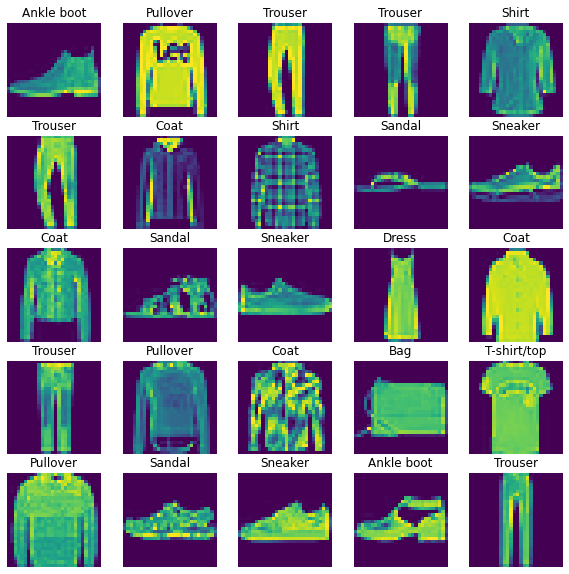

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train / 255.0   
x_test = x_test / 255.0 

y_train = np_utils.to_categorical(y_train, len(class_names))
y_test = np_utils.to_categorical(y_test, len(class_names))

plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[np.argmax(y_test[i])])
    plt.axis("off")
    
x_train.shape

In [2]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 128)               2769024   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
______________________________________________

In [3]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

hist = model.fit(x_train, y_train, 
                batch_size=128, 
                epochs=10, 
                validation_data=(x_test, y_test),
                verbose=1)

Epoch 1/10
469/469 [==============================] - 75s 158ms/step - loss: 0.4199 - accuracy: 0.8507 - val_loss: 0.3330 - val_accuracy: 0.8829
Epoch 2/10
469/469 [==============================] - 76s 163ms/step - loss: 0.2735 - accuracy: 0.9017 - val_loss: 0.2944 - val_accuracy: 0.8931
Epoch 3/10
469/469 [==============================] - 76s 163ms/step - loss: 0.2232 - accuracy: 0.9184 - val_loss: 0.2814 - val_accuracy: 0.8985
Epoch 4/10
469/469 [==============================] - 77s 164ms/step - loss: 0.1873 - accuracy: 0.9325 - val_loss: 0.2730 - val_accuracy: 0.9034
Epoch 5/10
469/469 [==============================] - 76s 163ms/step - loss: 0.1598 - accuracy: 0.9414 - val_loss: 0.2897 - val_accuracy: 0.8979
Epoch 6/10
469/469 [==============================] - 77s 164ms/step - loss: 0.1379 - accuracy: 0.9502 - val_loss: 0.2854 - val_accuracy: 0.9051
Epoch 7/10
469/469 [==============================] - 76s 163ms/step - loss: 0.1138 - accuracy: 0.9595 - val_loss: 0.2807 - val_ac

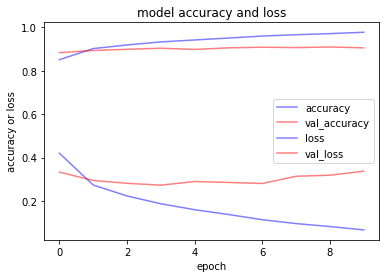

In [4]:
plt.plot(hist.history['accuracy'], 'b', alpha = 0.5, label = 'accuracy')
plt.plot(hist.history['val_accuracy'], 'r', alpha = 0.5, label = 'val_accuracy')
plt.plot(hist.history['loss'], 'b', alpha = 0.5, label = 'loss')
plt.plot(hist.history['val_loss'], 'r', alpha = 0.5, label = 'val_loss')
plt.title('model accuracy and loss')
plt.ylabel('accuracy or loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", round(score[0],2))
print("Test accuracy:", round(score[1],2))

# model.save('fashion_mnist_model.h5')

Test loss: 0.34
Test accuracy: 0.91


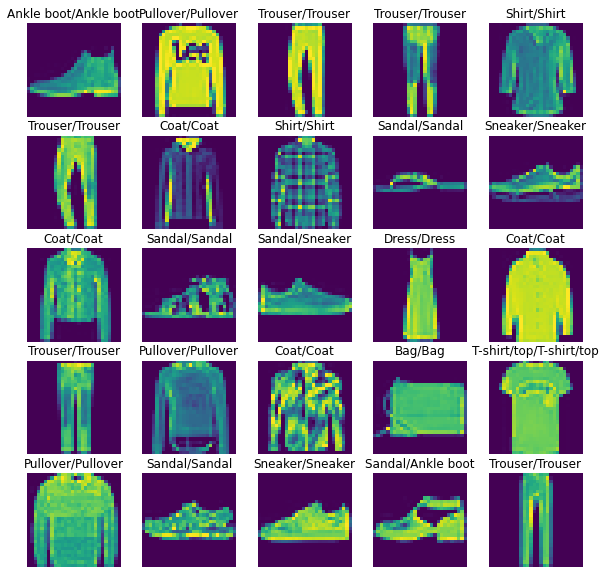

In [6]:
# model = keras.models.load_model('fashion_mnist_model.h5')
predictions = model.predict(x_test)

plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[np.argmax(predictions[i])]+'/'+class_names[np.argmax(y_test[i])])
    plt.axis("off")
    
# 91%